In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
labelencoder=LabelEncoder()
df['species_encoded']=labelencoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [27]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [33]:
results = {}

In [43]:
k_values = range(1, 11)  
accuracies = []

In [53]:
for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    
    y_pred = knn.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=labelencoder.classes_, output_dict=True)
    results[k] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }
    
    
    accuracies.append(accuracy)

In [55]:
best_k = max(results, key=lambda k: results[k]['accuracy'])
best_results = results[best_k]

In [59]:
print(f"Best K: {best_k}")
print(f"Accuracy: {best_results['accuracy']:.2f}")
print("Confusion Matrix:")
print(best_results['confusion_matrix'])
print("\nClassification Report:")
print(classification_report(y_test, knn.predict(X_test), target_names=labelencoder.classes_))


Best K: 5
Accuracy: 0.98
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



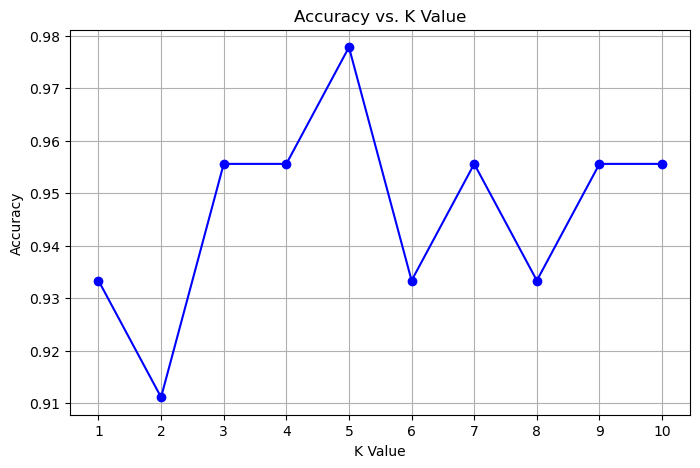

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()